# Analytics Engeneering Candiate Test 

We are tasked with understanding the performance of surgeons within an orthopedic clinic. Specificall, we are asked to evaluate the patient feedback in regards to hip replacement surgery 

The clinic uses a scoring questionnaire to measure the oucomes of surgeries. This survey is a self-evaluation survey in regards to ones experienced discomfort, in terms of mobilitz, self-care, anxiety and more. These answers are indexed towards a score that is deducted from a base of 1, giving the overall "health score" 

To understand the performance of the surgoeons, we will : 

- Explore datasets avaialble for use 
- Design a summary table that gives us statistics on the *incremental improvement* between surveys (difference between the health-scores pre and post, a proxy for the performance of the surgery) 
- Evaluate which surgeons are under and over performing, and other insight 

Our findings can be summarised as: 

- Han Solo has the highest average increase in health score, and one of the lowest variations in performance
- Darth Sidious has the second highest average increase, but also the highest variation in performance
- Darth Maul could be considered the worst of all ; he has the second lowest average score but also the 3rd highest variation in scores of all surgeons


## Connection to Database using psycopg2

In [1]:
import psycopg2
import pandas as pd

In [2]:
DB_NAME = "hiring_test"
DB_USER = "caecb52c924591a851124c119524b45a2"
DB_HOST = "candidate-testing.cowkpei4bgel.eu-central-1.rds.amazonaws.com"
DB_PORT = "5432"
DB_PASSWORD = 'fdf4780e63f93eb7181b37526da36d5e'

In [3]:
def SQL_Query(Q):
    
    try:
        conn = psycopg2.connect(database = DB_NAME, user = DB_USER,
                            host = DB_HOST, port = DB_PORT, password = DB_PASSWORD )
        print('connected')
    except:
        print('not connected')
    
    cur = conn.cursor()
    cur.execute(Q)
    rows = cur.fetchall()
    Data = pd.DataFrame(rows)
    colname= [desc[0] for desc in cur.description]
    Data.columns = colname
    return(Data)
    curr.close()
    conn.close()

In [6]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.answers'''

In [7]:
# Test Query 

SQL_Query(QUERY)


connected


,id,question_id,patient_id,questionnaire_id,answer
0,1,1,1,1,I have slight problems in walking around
1,2,2,1,1,I have severe problems washing or dressing myself
2,3,3,1,1,I have moderate problems doing my usual activi...
3,4,4,1,1,I have severe pain or discomfort
4,5,5,1,1,I am slightly anxious or depressed
...,...,...,...,...,...
218515,218516,1,25000,4,I have slight problems in walking around
218516,218517,2,25000,4,I have severe problems washing or dressing myself
218517,218518,3,25000,4,I have severe problems doing my usual activities
218518,218519,4,25000,4,I have no pain or discomfort


# Extract Data 

Get all tables into separate DF for further processing and analysis

In [9]:
answers = SQL_Query(QUERY) 

answers.head()


connected


,id,question_id,patient_id,questionnaire_id,answer
0,1,1,1,1,I have slight problems in walking around
1,2,2,1,1,I have severe problems washing or dressing myself
2,3,3,1,1,I have moderate problems doing my usual activi...
3,4,4,1,1,I have severe pain or discomfort
4,5,5,1,1,I am slightly anxious or depressed


In [88]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.answer_options'''
answers_options = SQL_Query(QUERY) 
answers_options.head()

connected


,question_id,answer,severity_code,central_estimate
0,1,I have no problems in walking around,1,0
1,1,I have slight problems in walking around,2,0.058
2,1,I have moderate problems in walking around,3,0.076
3,1,I have severe problems in walking around,4,0.207
4,1,I am unable to walk around,5,0.274


In [12]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.patients'''
patients = SQL_Query(QUERY) 
patients.head()

connected


,id,gender,surgeon_id
0,1,Male,9
1,2,Female,4
2,3,Male,9
3,4,Female,1
4,5,Female,5


In [13]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.questionnaires'''
questionnaires = SQL_Query(QUERY) 
questionnaires

connected


,id,type,treatment,questions
0,1,pre,Hip,"[1, 2, 3, 4, 5]"
1,2,post,Hip,"[1, 2, 3, 4, 5]"
2,3,pre,Knee,"[1, 2, 3, 4, 5]"
3,4,post,Knee,"[1, 2, 3, 4, 5]"


In [14]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.questions'''
questions = SQL_Query(QUERY) 
questions

connected


,id,title,description
0,1,Mobility,Please indicate what applies
1,2,Self-care,Please indicate what applies
2,3,Usual activities,Please indicate what applies
3,4,Pain / discomfort,Please indicate what applies
4,5,Anxiety / depression,Please indicate what applies


In [15]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.surgeons'''
surgeons = SQL_Query(QUERY) 
surgeons

connected


,id,name
0,1,Darth Vader
1,2,Yoda
2,3,Padme Amidala
3,4,Jar Jar Binks
4,5,Mon Mothma
5,6,Darth Sidious
6,7,Darth Maul
7,8,Luke Skywalker
8,9,Han Solo
9,10,Obi-Wan Kenobi


# Exploratory Analysis 

Start with building an overview of what we have 


## Answers Table 

Answers table is the central table that gives us the individual answers from the questionnaires. We find that 

- There are 24638 patients 
- There are in total 5 different questions 
- There are 4 different types of questionnaires

In [27]:

answers.agg({"patient_id" : "nunique", "question_id" : "nunique","questionnaire_id" : "nunique"})


patient_id          24628
question_id             5
questionnaire_id        4
dtype: int64

According to the task, we are supposed to evaluate the ability of surgeons to perform *hip replacement* surgery. We expect 2 questionnaires per patient ; one before and one after the surgery. As we have 4 distinct questionnaires, we need to understand what the questionnaire_id´s mean 

In [30]:
questionnaires

,id,type,treatment,questions
0,1,pre,Hip,"[1, 2, 3, 4, 5]"
1,2,post,Hip,"[1, 2, 3, 4, 5]"
2,3,pre,Knee,"[1, 2, 3, 4, 5]"
3,4,post,Knee,"[1, 2, 3, 4, 5]"


The questionnaires table tells us that id 1 & 2 are representing the answers for Hip treatment. Thus, we clean the answers table to only contain answers for the Hip questionnaires. 

In [67]:
QUERY = '''SELECT  *
           FROM caecb52c924591a851124c119524b45a2.answers
           WHERE questionnaire_id IN (1,2)'''
answers_hip = SQL_Query(QUERY) 

answers_hip.head()
nr = answers_hip["patient_id"].nunique()

print(f" There are {nr} patients with a hip replacement" )

connected
 There are 12305 patients with a hip replacement


Now, we need to make sure all the patients actually have both a pre and post answer to the survey. We do a quick check that every patient has at least 2 questionnaire_ids, and 5 answers for each 

In [68]:
# aggregate the number of answers and questionnaires answered per patient 

aggregated =  (answers_hip.groupby(["patient_id"]).agg({"question_id" : "count", "questionnaire_id" : "nunique"})).reset_index()

# count the number of patients that had less than 10 answers or 2 questionaires filled 

missing_answers =  aggregated[(aggregated["question_id"] != 10) | (aggregated["questionnaire_id"] != 2)]["patient_id"].nunique()

print( f"there are {missing_answers} patients with a missing questionnaire ; these can´t be evalauted") 


there are 2748 patients with a missing questionnaire ; these can´t be evalauted


Right! We have 2748 patients that we cannot use in our analysis, as theres is no post- treatment data on them. As we saw previously, questionnaire id 1 means the pre questionnaire, and we are missing questionnaire id 2 for those users. 

In [69]:
patients_to_remove = list(aggregated[(aggregated["question_id"] != 10) | (aggregated["questionnaire_id"] != 2)]["patient_id"])
aggregated[(aggregated["question_id"] != 10) | (aggregated["questionnaire_id"] != 2)].groupby(["questionnaire_id"]).count()


,patient_id,question_id
questionnaire_id,,
1,2748,2748


In [78]:
answers_hip["remove"] = answers_hip["patient_id"].apply(lambda x : 1 if x in patients_to_remove else 0)

answers_hip_all_answers = answers_hip[answers_hip["remove"] == 0]


/anaconda/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [84]:
answers_hip_all_answers = answers_hip[answers_hip["remove"] == 0]
answers_hip_all_answers["patient_id"].nunique()

9557

In [97]:
answers_hip_all_answers.head()
len(answers_hip_all_answers)

95570

# Building Dataset 

Now that we have cleaned the answers table, we can start building the scores. The answers table only provides the text version of the answer ; we need to join it with other tables to get the specific scores. The row count before and after the join are the same, so we can be sure that the join did not create unwanted duplication 

In [99]:
# join scores to the answers table 
answers_hip_all_answers_and_scores = pd.merge(answers_hip_all_answers,answers_options, how = "inner", on = ["question_id","answer"])
answers_hip_all_answers_and_scores

,id,question_id,patient_id,questionnaire_id,answer,remove,severity_code,central_estimate
0,1,1,1,1,I have slight problems in walking around,0,2,0.058
1,101,1,11,1,I have slight problems in walking around,0,2,0.058
2,156,1,17,1,I have slight problems in walking around,0,2,0.058
3,216,1,23,1,I have slight problems in walking around,0,2,0.058
4,271,1,28,2,I have slight problems in walking around,0,2,0.058
...,...,...,...,...,...,...,...,...
95565,218074,4,24947,1,I have extreme pain or discomfort,0,5,0.335
95566,218099,4,24949,2,I have extreme pain or discomfort,0,5,0.335
95567,218259,4,24969,1,I have extreme pain or discomfort,0,5,0.335
95568,218309,4,24975,1,I have extreme pain or discomfort,0,5,0.335


We now create a table with the overall score per questionnaire per patient

In [105]:
# calcualte health score per questionnaire 
patient_scores = answers_hip_all_answers_and_scores.groupby(["patient_id", "questionnaire_id"])["central_estimate"].sum().reset_index()
patient_scores["central_estimate"] = 1 - patient_scores["central_estimate"]
patient_scores 

,patient_id,questionnaire_id,central_estimate
0,1,1,0.639
1,1,2,0.491
2,6,1,0.422
3,6,2,0.478
4,11,1,0.529
...,...,...,...
19109,24985,2,0.217
19110,24992,1,0.360
19111,24992,2,0.405
19112,24993,1,0.363


In [113]:
# rename cols for join and join patient & surgeon information 

patients = patients.rename(columns = {"id" : "patient_id"})
surgeons = surgeons.rename(columns = {"id" : "surgeon_id"})

scores = pd.merge(pd.merge(patient_scores,patients, on = ["patient_id"]),surgeons, on = ["surgeon_id"])
scores


,patient_id,questionnaire_id,central_estimate,gender,surgeon_id,name
0,1,1,0.361,Male,9,Han Solo
1,1,2,0.509,Male,9,Han Solo
2,11,1,0.471,Female,9,Han Solo
3,11,2,0.663,Female,9,Han Solo
4,28,1,0.667,Female,9,Han Solo
...,...,...,...,...,...,...
19109,24965,2,0.573,Male,7,Darth Maul
19110,24975,1,-0.136,Male,7,Darth Maul
19111,24975,2,0.874,Male,7,Darth Maul
19112,24983,1,0.505,Female,7,Darth Maul


now, we pivot the table to get nice statistics from the diffrent surgeons 

In [132]:
# pivot data to get difference in scores, our incremental change

pivoted_scores = pd.pivot(scores, values = "central_estimate", columns = "questionnaire_id", index ="patient_id").reset_index()
pivoted_scores = pd.merge(pd.merge(pivoted_scores,patients, on = ["patient_id"]),surgeons, on = ["surgeon_id"])
final_df = pivoted_scores.rename(columns = {1 : "pre", 2 : "post"})
final_df


,patient_id,pre,post,gender,surgeon_id,name
0,1,0.361,0.509,Male,9,Han Solo
1,11,0.471,0.663,Female,9,Han Solo
2,28,0.667,0.696,Female,9,Han Solo
3,85,0.458,0.788,Female,9,Han Solo
4,91,0.564,0.669,Female,9,Han Solo
...,...,...,...,...,...,...
9552,24925,0.509,0.514,Female,7,Darth Maul
9553,24935,0.602,0.195,Male,7,Darth Maul
9554,24965,0.605,0.573,Male,7,Darth Maul
9555,24975,-0.136,0.874,Male,7,Darth Maul


# Analysis 

With our new table "final_df" we have the scores for every surgeon for the specific surgery in a clean, easz to analyse table. We will start by looking at the basic statistics for every surgeon 

In [133]:
final_df["surgery_increment"] = final_df["post"] - final_df["pre"]

In [144]:
for i in ["surgery_increment", "post", "pre"]:
    final_df[i] = final_df[i].astype(float)

In [191]:
final_df.groupby(["name"]).agg({"patient_id" : "nunique", "surgery_increment" : "mean", "pre" : "mean" , "post" : "mean"}).sort_values(by = "surgery_increment" )



,patient_id,surgery_increment,pre,post
name,,,,
Mon Mothma,977,0.104632,0.506693,0.611324
Darth Maul,965,0.105657,0.502183,0.607840
Obi-Wan Kenobi,926,0.111513,0.495499,0.607012
Yoda,958,0.112706,0.500205,0.612910
Padme Amidala,985,0.115952,0.499692,0.615645
Darth Vader,982,0.116118,0.493050,0.609168
Luke Skywalker,920,0.117918,0.493982,0.611900
Jar Jar Binks,919,0.118824,0.494485,0.613309
Darth Sidious,960,0.121688,0.489342,0.611029


At a first glance, the differences are not too large. The surgeon with the highest average increase is Han Solo, closely followed by Darth Sidious. The worst of the lot being Mon Mothma and Darth Maul. In general, all surgeons have performed more/less the same amount of surgeries (Jar Jar Binks and Luke Skywalker are slacking with around 920 vs Darth Vaders and Padme. Power Couple!). 

But, averages dont tell the entire story. We plot the distribution of the different surgeons performance over their surgeries 

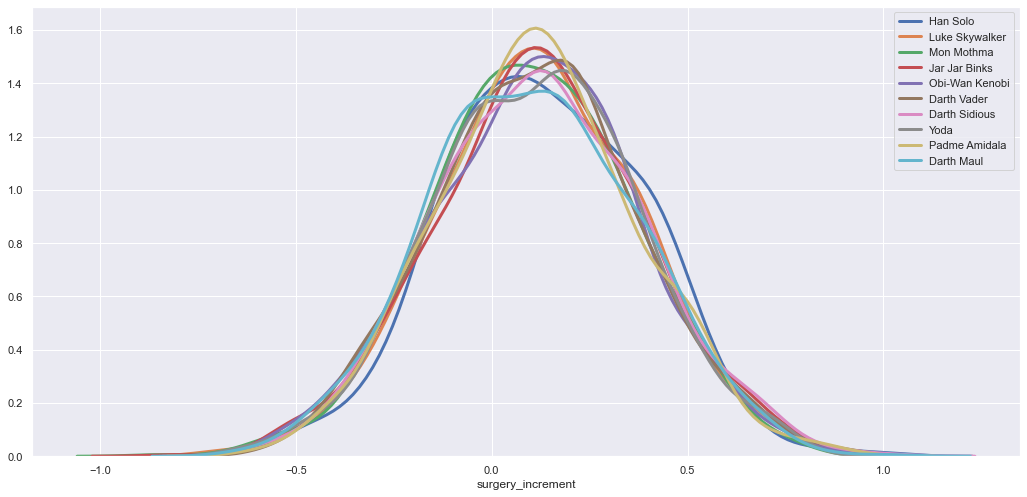

In [176]:
names = list(final_df["name"].unique())

sns.set(rc={'figure.figsize':(17.7,8.27)})

# Iterate through the names
for name in names:
    # Subset to the names
    subset = final_df[final_df['name'] == name]
    
    # Draw the density plot
    sns.distplot(subset['surgery_increment'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)
    

We observe that most performances are normally distributed. Therefore, the mean is a relatively good measure to compare the different surgeons on. To be more statistically minded, we can compute the standard deviations of every surgeon. All low standard deviation would entail that the surgeon is consistently performing around a specific range, which in my opinion, is a postive aspect. Who wants a surgeon that one day cuts off your arm, and the next saves your life? 

In [189]:
final_df.groupby(["name"]).agg({"surgery_increment" : "std"}).sort_values(by = "surgery_increment")



,surgery_increment
name,
Padme Amidala,0.255017
Mon Mothma,0.255614
Han Solo,0.256200
Luke Skywalker,0.257203
Yoda,0.257291
Darth Vader,0.259649
Obi-Wan Kenobi,0.260164
Darth Maul,0.263589
Jar Jar Binks,0.264352


# Summary 

We find that : 

- Han Solo has the highest average increase in health score, and one of the lowest variations in performance 
- Darth Sidious has the second highest average increase, but also the highest variation in performance 
- Darth Maul could be considered the worst of all ; he has the second lowest average score but also the 3rd highest variation in scores of all surgeons